# drive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [2]:
import pandas as pd
import numpy as np 


import seaborn as sns
import matplotlib.pyplot as plt


# CFG

In [3]:
class CFG :
    SEED = 42
    PATH = "/content/drive/MyDrive/Dacon/FIANL_MOVIE_RECOM/"

# Load data

In [4]:
with open(f"{CFG.PATH}DATA/movies_moviereviewdummy_202301130957.csv", 'r',encoding='utf-8') as f:
    data = pd.read_csv(f)
data.head(10)

,no,grade,review,c_date,movie_id
0,1,1.0,와 정말 무서운집 수준의 공포영화가 한국에 다시 나왔네요. 꼭 보러 가세요.착석하신...,2019-05-29 13:30:00,177371
1,2,10.0,"내용 구성이나 연출, cg는 저예산 영화 정도의 수준이었지만 정은지가 연기를 잘한다",2019-05-29 10:58:00,177371
2,3,2.0,상엽이 형은 어쩌다가 어릴때 죽었는지 다리 피흘리는 여고생 연관있을줄 알았는데 연관...,2019-05-29 20:15:00,177371
3,4,10.0,정은지 연기 소름...,2019-05-29 12:21:00,177371
4,5,6.0,일단 정은지는 완전 합격점. 최윤영도 좋았다. 여배우 둘 빼면 에휴...게다가 초반...,2019-05-29 11:34:00,177371
5,6,10.0,정은지는 노래도 월클이고 연기까지 월클인 것 같다. !,2019-05-29 11:37:00,177371
6,7,10.0,정은지 스크린 데뷔 넘 좋았음 ㅠㅠ 표정 꿈에 나올듯 개무섭,2019-05-29 11:27:00,177371
7,8,10.0,킬링타임용 공포영화로는 괜찮음 단점도 많지만 볼만한 부분도 있음 여자 배우들 연기는...,2019-05-29 11:29:00,177371
8,9,10.0,아는형님에서 정은지 눈빛연기보고 이건 봐야겠다 했는데 공포연기 ㅎㄷㄷ 눈빛 진짜 공...,2019-05-29 09:35:00,177371
9,10,10.0,정은지 연기 물올랐다 ㄷㄷㄷ 보는내내 숨막혀 죽는줄 원작웹툰도 명작이었는데 영화도 ...,2019-05-29 12:11:00,177371


In [5]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 32.5 MB/s eta 0:00:00


In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

In [7]:
data.shape

(108280, 5)

In [8]:
# review 열과 c_date 열의 중복을 제외한 값의 개수
data['review'].nunique(), data['c_date'].nunique()

(104650, 101723)

In [9]:
data.loc[data.review.isnull()]

,no,grade,review,c_date,movie_id
110,111,1.0,NaN,2020-07-26 19:31:00,189051
349,350,2.0,NaN,2019-10-03 11:29:00,186679
408,409,10.0,NaN,2019-10-23 10:09:00,179482
424,425,10.0,NaN,2019-10-23 10:09:00,179482
426,427,10.0,NaN,2019-10-23 10:59:00,179482
...,...,...,...,...,...
108218,108219,9.0,NaN,2022-02-08 23:40:00,10621
108219,108220,10.0,NaN,2022-01-06 22:35:00,10621
108223,108224,10.0,NaN,2021-07-04 21:40:00,10621
108228,108229,10.0,NaN,2020-02-23 18:54:00,10621


In [10]:
# Null 값이 존재하는 행 제거 
# c_date가 null인경우가 없어 아래처럼 작성했지만, 확인 요망
data = data.dropna(how = 'any') 

# Null 값이 존재하는지 확인
print(data.isnull().values.any()) 

False


In [11]:
# 특수문자 & ㄷㄷㄷ, ㅜㅜ 와 같은 문자열 제거
data['review'] = data['review'].str.replace("[^가-힣A-Za-z ]","")
data[:30]

<ipython-input-11-382351978531>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review'] = data['review'].str.replace("[^가-힣A-Za-z ]","")


,no,grade,review,c_date,movie_id
0,1,1.0,와 정말 무서운집 수준의 공포영화가 한국에 다시 나왔네요 꼭 보러 가세요착석하신 순...,2019-05-29 13:30:00,177371
1,2,10.0,내용 구성이나 연출 cg는 저예산 영화 정도의 수준이었지만 정은지가 연기를 잘한다,2019-05-29 10:58:00,177371
2,3,2.0,상엽이 형은 어쩌다가 어릴때 죽었는지 다리 피흘리는 여고생 연관있을줄 알았는데 연관...,2019-05-29 20:15:00,177371
3,4,10.0,정은지 연기 소름,2019-05-29 12:21:00,177371
4,5,6.0,일단 정은지는 완전 합격점 최윤영도 좋았다 여배우 둘 빼면 에휴게다가 초반 고막 묵...,2019-05-29 11:34:00,177371
5,6,10.0,정은지는 노래도 월클이고 연기까지 월클인 것 같다,2019-05-29 11:37:00,177371
6,7,10.0,정은지 스크린 데뷔 넘 좋았음 표정 꿈에 나올듯 개무섭,2019-05-29 11:27:00,177371
7,8,10.0,킬링타임용 공포영화로는 괜찮음 단점도 많지만 볼만한 부분도 있음 여자 배우들 연기는...,2019-05-29 11:29:00,177371
8,9,10.0,아는형님에서 정은지 눈빛연기보고 이건 봐야겠다 했는데 공포연기 눈빛 진짜 공포물 최적화,2019-05-29 09:35:00,177371
9,10,10.0,정은지 연기 물올랐다 보는내내 숨막혀 죽는줄 원작웹툰도 명작이었는데 영화도 꿀잼이었다,2019-05-29 12:11:00,177371


In [12]:
# 영화별로 긍/부정 평가의 분포

In [13]:
# 긍/부정 라벨 생성 - 여기를 단순 7이 아니라 quntile 이런걸로 해야하나 
data["label"] = data["grade"].apply(lambda x : 1 if x>5 else 0 )

# 부정개수                            긍정개수
len(data['label']) -  data["label"].sum(), data["label"].sum()



(27590, 77723)

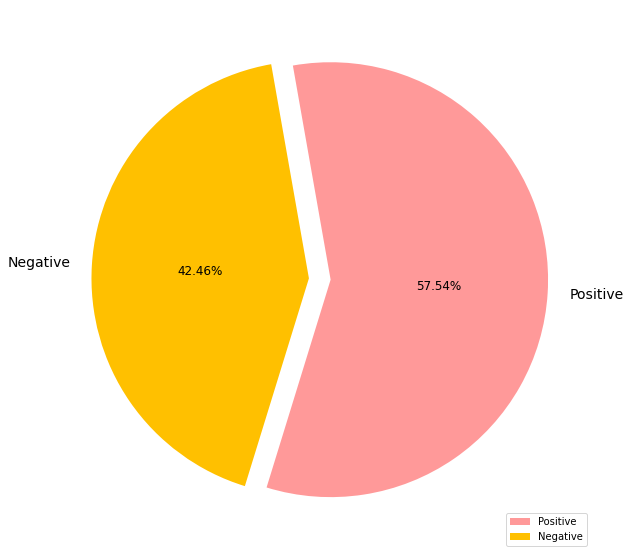

In [14]:
colors = ['#ff9999', '#ffc000']
col = ["Positive","Negative"]


fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
explode = [0.05, 0.05]
frequency = [ len(data["label"] - data["label"].sum() ) , data["label"].sum()  ]
# frequency =  tmp_df.groupby("release_year")["id"].count()

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=100, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       labels=col,
       colors = colors, ## 색상 지정
       explode=explode, 
       textprops={'fontsize': 14} # 라벨 텍스트 사이즈 지정 
       )
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 

config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

for i,l in enumerate(col):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(col) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    # ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    # if frequency[i]/total*100 < threshold:
    #     ang = (ang1+ang2)/2 ## 중심각
    #     x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
    #     y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
    #     ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
    #     ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
    #     horizontalalignment = {-1: "right", 1: "right"}[int(np.sign(x))]
    #     connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
    #     config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
    #     ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.03, 1.2*y+0.03),
    #                 horizontalalignment=horizontalalignment, **config)
    # else:
    x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
    y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    ax.text(x,y,text,ha='center',va='center',fontsize=12)
    
plt.legend(pie[0],col,loc='lower right') ## 범례
plt.show()


In [15]:
print("전체영화 평균 평점은 {:.2f}".format(data['grade'].mean()))

전체영화 평균 평점은 7.28


In [16]:
# 영화별 평균 평점
data.groupby("movie_id")["grade"].mean()

movie_id
10526     8.111111
10621     9.293478
13481     7.142857
13512     8.956522
13775     8.291667
            ...   
223815    8.724138
223816    8.453608
224336    9.345455
224919    5.333333
225699    9.272727
Name: grade, Length: 1562, dtype: float64

In [17]:
#영화별  긍정 비율
data.groupby("movie_id")["label"].sum() / data.groupby("movie_id")["label"].count()

movie_id
10526     0.904762
10621     0.989130
13481     0.714286
13512     0.913043
13775     0.916667
            ...   
223815    0.873563
223816    0.896907
224336    0.927273
224919    0.666667
225699    0.909091
Name: label, Length: 1562, dtype: float64

In [18]:
feeling = [0 if rank in range(0,5) else 1 for rank in data['grade']]
pos_cnt = len([x for x in feeling if x==1])
neg_cnt = len([x for x in feeling if x==0])
print(("긍정비율 : {:.4f}%,".format(pos_cnt/len(feeling))+" 긍정개수 : {}개".format(pos_cnt)))
print(("부정비율 : {:.4f}%,".format(neg_cnt/len(feeling))+" 부정개수 : {}개".format(neg_cnt)))

긍정비율 : 0.7638%, 긍정개수 : 80434개
부정비율 : 0.2362%, 부정개수 : 24879개


In [19]:
# 띄어쓰기 고치기
# https://haystar.tistory.com/11 참고

In [20]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-mbox6ou0
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-mbox6ou0
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 1f8d11c59ac93525432f164e4c237ece4e298691
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 745.4 kB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268637 sha256=12c5e3a1f2f8524764a850927b250e627d16339f8c54c3274debd38041049eb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-rplkcsr4/wheels/79/a0/33/16f2cd03d21f76a663f5d69a0b96f0351335385349136fbd03
Successfully built pykospacing
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully

In [21]:
# from pykospacing import Spacing
# spacing = Spacing()
# data['space_review'] = data['review'].apply(lambda x: spacing(x) )

# 네이버 한글 맞춤법 검사기 베이스
- 띄어쓰기 + 맞춤법 교정 

In [22]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-obuq87io
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-obuq87io
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=c7aa291e219d34e8ccd986fc7bab32550a281397f7f42ecafcb5c8dcfe9d03ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-4apn0i2q/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

data["fix_review"] = data["review"].apply(lambda x : spell_checker.check(x))
data["fix_review"]

In [ ]:
data.to_csv(f"{CFG.PATH}DATA/clean_review.csv", index=False, encoding="utf-8-sig", header=data.columns)